In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
raw_df.rename(columns={0: 'CRIM'}, inplace=True)
raw_df.rename(columns={1: 'ZN'}, inplace=True)
raw_df.rename(columns={2: 'INDUS'}, inplace=True)
raw_df.rename(columns={3: 'CHAS'}, inplace=True)
raw_df.rename(columns={4: 'NOX'}, inplace=True)
raw_df.rename(columns={5: 'RM'}, inplace=True)
raw_df.rename(columns={6: 'AGE'}, inplace=True)
raw_df.rename(columns={7: 'DIS'}, inplace=True)
raw_df.rename(columns={8: 'RAD'}, inplace=True)
raw_df.rename(columns={9: 'TAX'}, inplace=True)
raw_df.rename(columns={10: 'PTRATIO'}, inplace=True)

In [4]:
# Первые 5 строк датасета
raw_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [5]:
# Размер датасета - 1012 строк, 11 колонок
raw_df.shape
(1012, 11)
total_count = raw_df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1012


In [6]:
# Список колонок
raw_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO'],
      dtype='object')

In [7]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in raw_df.columns:
# Количество пустых значений - все значения заполнены
    temp_null_count = raw_df[raw_df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

CRIM - 0
ZN - 0
INDUS - 0
CHAS - 506
NOX - 506
RM - 506
AGE - 506
DIS - 506
RAD - 506
TAX - 506
PTRATIO - 506


In [8]:
# Список колонок с типами данных
raw_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
dtype: object

In [9]:
raw_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
count,1012.000000,1012.000000,1012.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,180.143778,12.008350,16.834792,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,188.132839,17.250728,9.912616,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,0.257830,0.000000,8.375000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,24.021000,7.240000,18.100000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,391.435000,16.780000,21.890000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,396.900000,100.000000,50.000000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


In [10]:
# Определим уникальные значения для целевого признака
raw_df['TAX'].unique()

array([296.,  nan, 242., 222., 311., 307., 279., 252., 233., 243., 469.,
       226., 313., 256., 284., 216., 337., 345., 305., 398., 281., 247.,
       270., 276., 384., 432., 188., 437., 403., 193., 265., 255., 329.,
       402., 348., 224., 277., 300., 330., 315., 244., 264., 223., 254.,
       198., 285., 241., 293., 245., 289., 358., 304., 287., 430., 422.,
       370., 352., 351., 280., 335., 411., 187., 334., 666., 711., 391.,
       273.])

In [11]:
# Удаление строк, содержащих пустые значения
raw_df_2 = raw_df.dropna(axis=0, how='any')
(raw_df.shape, raw_df_2.shape)

((1012, 11), (506, 11))

C:\Users\farkhat\AppData\Local\Temp\ipykernel_13408\860957.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(raw_df_2.corr(), dtype=np.bool)


<AxesSubplot:>

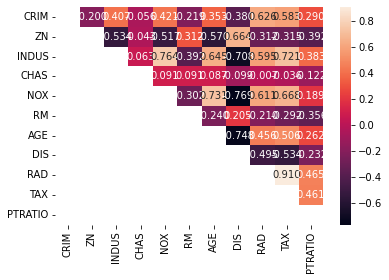

In [12]:
# Вывод значений в ячейках
mask = np.zeros_like(raw_df_2.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(raw_df_2.corr(), mask=mask, annot=True, fmt='.3f')

C:\Users\farkhat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TAX', ylabel='Density'>

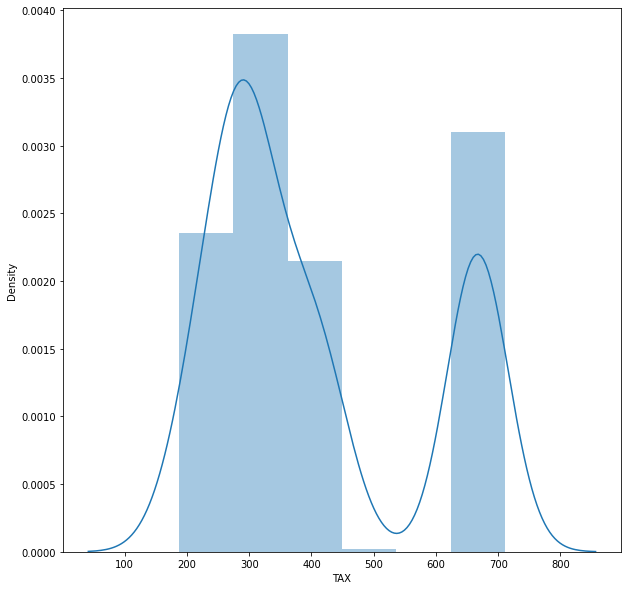

In [13]:
# Гистограмма
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(raw_df['TAX'])

## Диаграмма рассеяния